## Import required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Question 1

Simulate a Discrete Probability Distribution
a. Write Python code to simulate a discrete random variable representing a die
roll (numbers 1 through 6).
b. Generate 10,000 random rolls of a fair die using NumPy.
c. Plot the probability mass function (PMF) using a bar plot.

Rolling a dice once: 
Answer = 3
10000 random rolls: 
Answer = [5 6 4 ... 3 5 1]
Plotting the probability mass function: 
             count
dice_value        
1           0.1625
2           0.1646
3           0.1700
4           0.1612
5           0.1714
6           0.1703


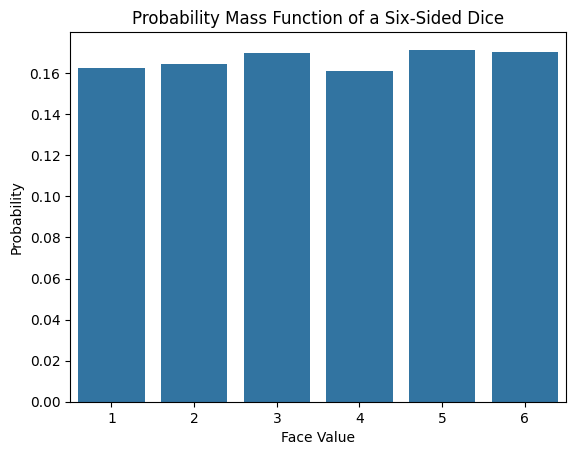

In [65]:
def roll_dice():
    return np.random.randint(1, 7)

def ten_thoushand_roll():
    return np.random.randint(1,7,10000)

def plot_pmf():
    rolls = ten_thoushand_roll()
    df=pd.DataFrame(data=rolls,columns="dice_value".split())
    #df=df.groupby('dice_value').size() 
    count_df=df.value_counts().sort_index().rename_axis("dice_value").to_frame("count")
    count_df["count"]=count_df["count"]/10000
    print(count_df)
    sns.barplot(x="dice_value", y="count", data=count_df)
    plt.title('Probability Mass Function of a Six-Sided Dice')
    plt.xlabel('Face Value')
    plt.ylabel('Probability')
    plt.show()

def solve_1():
    print("Rolling a dice once: ")
    print(f"Answer = {roll_dice()}")
    print("10000 random rolls: ")
    print(f"Answer = {ten_thoushand_roll()}")
    print("Plotting the probability mass function: ")
    plot_pmf()

solve_1()

## Question 2

Suppose that an examination consists of six true and false questions and assume
that a student has no knowledge of the subject matter. The probability that the
student will guess the correct answer to the first question is 30%. Likewise, the
probability of guessing each of the remaining questions correctly is also 30%.
a. What is the probability of getting exactly three correct answers?
b. What is the probability of getting at least two correct answers?
c. What is the probability of getting at most two correct answers?
d. What is the probability of getting less than five correct answers?

In [ ]:
def bionomial_distribution(x,n,p):
    return math.factorial(n) / (math.factorial(x) * math.factorial(n-x)) * (p**x) * ((1-p)**(n-x))

def solve_2():
    p=0.3
    n=6
    print("a. What is the probability of getting exactly three correct answers?")
    answer_a=bionomial_distribution(3,n,p)
    print(f"answer = {answer_a:.6f}")
    print("b. What is the probability of getting at least two correct answers?")
    answer_b=1-(bionomial_distribution(0,n,p)+bionomial_distribution(1,n,p))
    print(f" answer = {answer_b:.6f}")
    print("c. What is the probability of getting at most two correct answers?")
    answer_c=(bionomial_distribution(0,n,p)+bionomial_distribution(1,n,p)+bionomial_distribution(2,n,p))
    print(f"answer = {answer_c:.6f}")
    print("d. What is the probability of getting less than five correct answers?")
    answer_d=1-(bionomial_distribution(5,n,p)+bionomial_distribution(6,n,p))
    print(f"answer = {answer_d:.6f}")
    
solve_2()

a. What is the probability of getting exactly three correct answers?
answer = 0.185220
b. What is the probability of getting at least two correct answers?
 answer = 0.579825
c. What is the probability of getting at most two correct answers?
answer = 0.744310
d. What is the probability of getting less than five correct answers?
answer = 0.989065


## Question 3

In a study of drug-induced anaphylaxis among patients taking rocuronium bromide
as part of their anesthesia, the occurrence of anaphylaxis followed a Poisson
distribution with λ =12 incidents per year in Norway. Find the probability that in the
next year, among patients receiving rocuronium.
a. Exactly three will experience anaphylaxis.
b. At least two will experience anaphylaxis
c. At most two-experience anaphylaxis


In [ ]:
def poisson_distribution(lamda,k):
    return (np.exp(-lamda)* np.power(lamda,k))/ math.factorial(k)

def solve_3():
    lamda=12
    print("a. Exactly three will experience anaphylaxis.")
    answer_a=poisson_distribution(lamda,3)
    print(f"answer = {answer_a:.6f}")
    print("b. At least two will experience anaphylaxis.")
    answer_b=1-(poisson_distribution(lamda,0)+poisson_distribution(lamda,1))
    print(f"answer = {answer_b:.6f}")
    print("c. At most two-experience anaphylaxis.")
    answer_c=poisson_distribution(lamda,0)+poisson_distribution(lamda,1)+poisson_distribution(lamda,2)
    print(f"answer = {answer_c:.6f}")
    
solve_3()

a. Exactly three will experience anaphylaxis.
answer = 0.001770
b. At least two will experience anaphylaxis.
answer = 0.999920
c. At most two-experience anaphylaxis.
answer = 0.000522


## Question 4

Suppose mean height of 500 students is 160 cm and SD is 5 cm. If height follows
normal distribution, then calculate the following:
Note: to get z-score table value you can use: norm.cdf() method. To do so, just
import as – “from scipy.stats import norm”
a. What is the chance of height above 168 cm?
b. What percentage of students will have height above 168 cm?
c. How many of students will have height between 150 cm to 175cm?

In [63]:
from scipy.stats import norm
def z_score(x,mean,sd):
    return (x-mean)/sd

def solve_4():
    mean_height=160
    sd_height=5
    total_students=500
    print("a. What is the chance of height above 168 cm?")
    z_score_a=z_score(168,mean_height,sd_height)
    probability_height_above_168=1-norm.cdf(z_score_a)
    print(f"answer = {probability_height_above_168:.4f}")
    print("b. What percentage of students will have height above 168 cm? ")
    percent_height_above_168=probability_height_above_168*100
    print(f"answer = {percent_height_above_168:.3f}%")
    print("c. How many of students will have height between 150 cm to 175 cm?")
    z_score_150=z_score(150,mean_height,sd_height)
    z_score_175=z_score(175,mean_height,sd_height)
    students_with_height_between_150_to_175=norm.cdf(z_score_175)-norm.cdf(z_score_150)
    number_of_students_with_height_between_150_to_175=students_with_height_between_150_to_175*total_students
    print(f"answer = {number_of_students_with_height_between_150_to_175:.0f}")

solve_4()

a. What is the chance of height above 168 cm?
answer = 0.0548
b. What percentage of students will have height above 168 cm? 
answer = 5.480%
c. How many of students will have height between 150 cm to 175 cm?
answer = 488


Question 1: 
Rolling a dice once: 
Answer = 3
10000 random rolls: 
Answer = [2 5 2 ... 6 5 3]
Plotting the probability mass function: 
             count
dice_value        
1           0.1603
2           0.1655
3           0.1684
4           0.1711
5           0.1713
6           0.1634


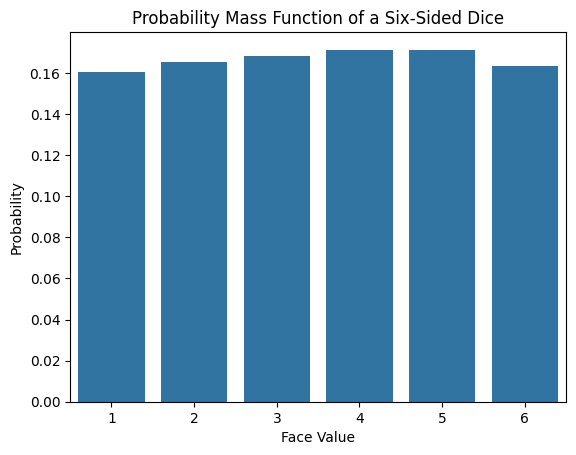


Question 2: 
a. What is the probability of getting exactly three correct answers?
answer = 0.185220
b. What is the probability of getting at least two correct answers?
 answer = 0.579825
c. What is the probability of getting at most two correct answers?
answer = 0.744310
d. What is the probability of getting less than five correct answers?
answer = 0.989065

Question 3: 
a. Exactly three will experience anaphylaxis.
answer = 0.001770
b. At least two will experience anaphylaxis.
answer = 0.999920
c. At most two-experience anaphylaxis.
answer = 0.000522

Question 4: 
a. What is the chance of height above 168 cm?
answer = 0.0548
b. What percentage of students will have height above 168 cm? 
answer = 5.480%
c. How many of students will have height between 150 cm to 175 cm?
answer = 488


In [66]:
if __name__ == "__main__":
    print("Question 1: ")
    solve_1()
    print("\nQuestion 2: ")
    solve_2()
    print("\nQuestion 3: ")
    solve_3()
    print("\nQuestion 4: ")
    solve_4()